In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from preprocessing_functions import X_data_preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from_file = CatBoostClassifier()
model = from_file.load_model('los.h5')
a=load_model('covid.h5')

In [3]:
data = pd.read_csv('train_data.csv')
data = data.dropna()
X = data.iloc[:, 1:17].values
y = data.iloc[:, -1].values

In [4]:
#for checking user-entered values
h_t_codes = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
h_r_codes = ['X', 'Y', 'Z']
depts = ['gynecology', 'anesthesia', 'radiotherapy', 'TB & Chest disease', 'surgery']
w_types = ['P', 'Q', 'R', 'S', 'T', 'U']
w_f_codes = ['A', 'B', 'C', 'D', 'E', 'F']
t_admissions = ['Emergency', 'Trauma', 'Urgent']
s_illnesses = ['Minor', 'Moderate', 'Extreme']

Enter the image name 1-s2.0-S1684118220300608-main.pdf-002.jpg
Enter Hospital Code (1 to 32) : 13
Enter Hospital Type Code (a to g) : b
Enter City Code Hospital (1 to 13) : 5
Enter Hospital Region Code (X, Y or Z) : Y
Available Extra Rooms in Hospital : 21
Departments:
1. gynecology
2. anesthesia
3. radiotherapy
4. TB & Chest disease
5. surgery
Enter Department : TB & Chest disease
Enter Ward Type (P to U) : T
Enter Ward Type (A to F) : D
Enter Bed Grade (1 to 4) : 3
Enter Patient ID : 93016
Enter City Code of the Patient (1 to 38) : 23
Enter Type of Admission (Emergency, Trauma or Urgent) : Emergency
Enter Severity of Illness (Minor, Moderate or Extreme) : Moderate
Enter Number of Visitors with Patient : 6
Enter Age of Patient : 56
Enter Admission_Deposit : 10000


Patient is suffering from Covid-19


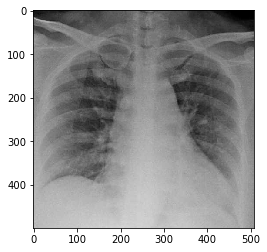

In [5]:
#user values
ans=input("Enter the Chest X-ray image name ")
h_code = int(input('Enter Hospital Code (1 to 32) : '))
h_t_code = input('Enter Hospital Type Code (a to g) : ')
c_c_hospital = int(input('Enter City Code Hospital (1 to 13) : '))
h_r_code = input('Enter Hospital Region Code (X, Y or Z) : ')
a_e_r_hospital = int(input('Available Extra Rooms in Hospital : '))
dept = input('Departments:\n1. gynecology\n2. anesthesia\n3. radiotherapy\n4. TB & Chest disease\n5. surgery\nEnter Department : ')
w_type = input('Enter Ward Type (P to U) : ')
w_f_code = input('Enter Ward Type (A to F) : ')
b_grade = int(input('Enter Bed Grade (1 to 4) : '))
p_id = int(input('Enter Patient ID : '))
c_c_patient = int(input('Enter City Code of the Patient (1 to 38) : '))
t_admission = input('Enter Type of Admission (Emergency, Trauma or Urgent) : ')
s_illness = input('Enter Severity of Illness (Minor, Moderate or Extreme) : ')
v_w_patient = int(input('Enter Number of Visitors with Patient : '))
age = int(input('Enter Age of Patient : '))
a_deposit = int(input('Enter Admission_Deposit : '))

#checking
if(h_code in range(1, 33) and h_t_code in h_t_codes and c_c_hospital in range(1,14) and h_r_code in h_r_codes and
   dept in depts and w_type in w_types and w_f_code in w_f_codes and b_grade in range(1,5) and p_id > 0 and
   c_c_patient in range(1, 39) and t_admission in t_admissions and s_illness in s_illnesses and
   age in range(1, 100)):
    m = int((age/10))*10+1
    n = (int((age/10))+1)*10
    age = str(m) + '-' + str(n)
    testimg=image.load_img(ans,target_size=(224, 224))
    testimg=image.img_to_array(testimg)
    testimg=np.expand_dims(testimg,axis=0)
    testimg= testimg/255.0
    result1=a.predict(testimg)
    if round(result1[0][0])==0:
        print("\n\nPatient is suffering from Covid-19")
    else:
        print("Report is Normal")
    a=plt.imread(ans)
    plt.imshow(a)
else:
    print('Please Enter Correct Details')
    exit()

In [6]:
user = [h_code, h_t_code, c_c_hospital, h_r_code, a_e_r_hospital, dept, w_type, w_f_code, b_grade, p_id,
            c_c_patient, t_admission, s_illness, v_w_patient, age, a_deposit]
print(user)
X = X.tolist()
X.insert(len(X), user)

[13, 'b', 5, 'Y', 21, 'TB & Chest disease', 'T', 'D', 3, 93016, 23, 'Emergency', 'Moderate', 6, '51-60', 10000]


In [7]:
X = X_data_preprocessing(X)
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
print(len(X))
print(X)
user = X[-1]
X = X[:-1]
print(X)
print(len(X))
user

313794
[[0.0 0.0 0.0 ... 31397 2 4911.0]
 [0.0 0.0 0.0 ... 31397 2 5954.0]
 [0.0 0.0 0.0 ... 31397 2 4745.0]
 ...
 [0.0 1.0 0.0 ... 91081 5 3761.0]
 [0.0 1.0 0.0 ... 21641 2 4752.0]
 [0.0 0.0 0.0 ... 93016 6 10000]]
[[0.0 0.0 0.0 ... 31397 2 4911.0]
 [0.0 0.0 0.0 ... 31397 2 5954.0]
 [0.0 0.0 0.0 ... 31397 2 4745.0]
 ...
 [0.0 0.0 0.0 ... 125235 3 4235.0]
 [0.0 1.0 0.0 ... 91081 5 3761.0]
 [0.0 1.0 0.0 ... 21641 2 4752.0]]
313793


array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21, 93016, 6,
       10000], dtype=object)

In [9]:
user_pred = model.predict(user)
user_pred = le.inverse_transform(user_pred)
print('Length of stay of patient ID', p_id, 'is', user_pred[0], 'days.')

Length of stay of patient ID 93016 is 31-40 days.
